In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E Commerce Dataset.csv")

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [5]:
df.shape

(5630, 20)

# 1.Data Preprocessing

## Handling Missing Values

In [6]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.Tenure.nunique()

36

In [8]:
df.WarehouseToHome.nunique()

34

In [9]:
df.HourSpendOnApp.nunique()

6

In [10]:
df.OrderAmountHikeFromlastYear.nunique()

16

In [11]:
df.CouponUsed.nunique()

17

In [12]:
df.OrderCount.nunique()

16

In [13]:
df.DaySinceLastOrder.nunique()

22

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['Tenure']])
df['Tenure']= imputer.fit_transform(df[['Tenure']])

In [15]:
imputer.fit(df[['Tenure']])
df['Tenure']= imputer.fit_transform(df[['Tenure']])
imputer.fit(df[['WarehouseToHome']])
df['WarehouseToHome']= imputer.fit_transform(df[['WarehouseToHome']])
imputer.fit(df[['HourSpendOnApp']])
df['HourSpendOnApp']= imputer.fit_transform(df[['HourSpendOnApp']])
imputer.fit(df[['OrderAmountHikeFromlastYear']])
df['OrderAmountHikeFromlastYear']= imputer.fit_transform(df[['OrderAmountHikeFromlastYear']])
imputer.fit(df[['CouponUsed']])
df['CouponUsed']= imputer.fit_transform(df[['CouponUsed']])
imputer.fit(df[['OrderCount']])
df['OrderCount']= imputer.fit_transform(df[['OrderCount']])
imputer.fit(df[['DaySinceLastOrder']])
df['DaySinceLastOrder']= imputer.fit_transform(df[['DaySinceLastOrder']])

In [16]:
df.isnull().sum().sort_values()

CustomerID                     0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
Complain                       0
NumberOfAddress                0
MaritalStatus                  0
SatisfactionScore              0
PreferedOrderCat               0
NumberOfDeviceRegistered       0
HourSpendOnApp                 0
Gender                         0
PreferredPaymentMode           0
WarehouseToHome                0
CityTier                       0
PreferredLoginDevice           0
Tenure                         0
Churn                          0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# EDA
## Categorical Cols

In [17]:
cats= ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
ordinal = ['CityTier', 'SatisfactionScore']
binary = ['Churn', 'Complain']
nums = df.loc[:, ~df.columns.isin(cats + binary + ordinal)].columns[1:]

In [18]:
df[cats].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [19]:
for col in cats:
    vc = df[col].value_counts().rename_axis(col).reset_index(name='Counts')
    display(vc)

,PreferredLoginDevice,Counts
0,Mobile Phone,2765
1,Computer,1634
2,Phone,1231


,PreferredPaymentMode,Counts
0,Debit Card,2314
1,Credit Card,1501
2,E wallet,614
3,UPI,414
4,COD,365
5,CC,273
6,Cash on Delivery,149


,Gender,Counts
0,Male,3384
1,Female,2246


,PreferedOrderCat,Counts
0,Laptop & Accessory,2050
1,Mobile Phone,1271
2,Fashion,826
3,Mobile,809
4,Grocery,410
5,Others,264


,MaritalStatus,Counts
0,Married,2986
1,Single,1796
2,Divorced,848


# Univaritae Analysis

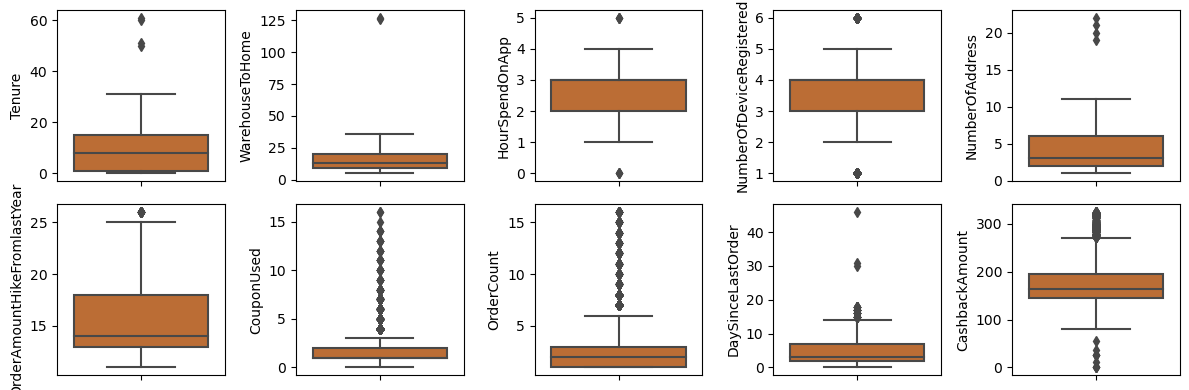

In [20]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='chocolate')
    plt.tight_layout()

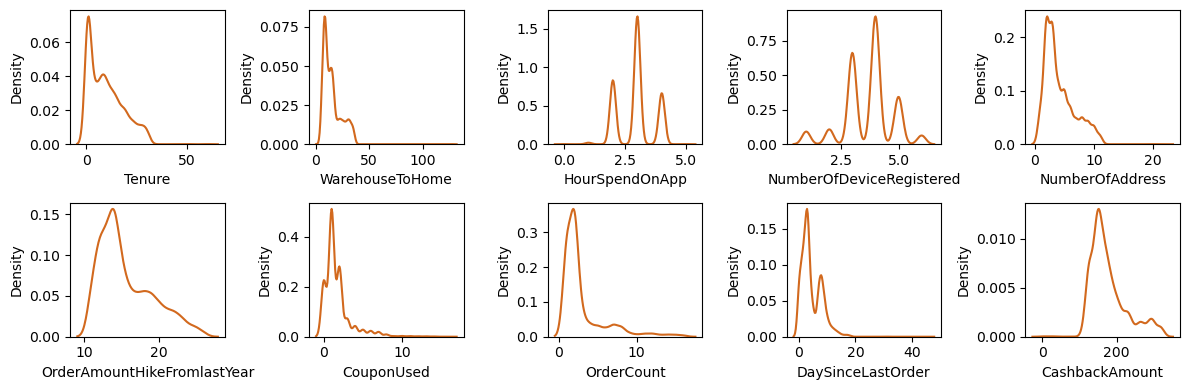

In [21]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[nums[i]], color='chocolate')
    plt.tight_layout()

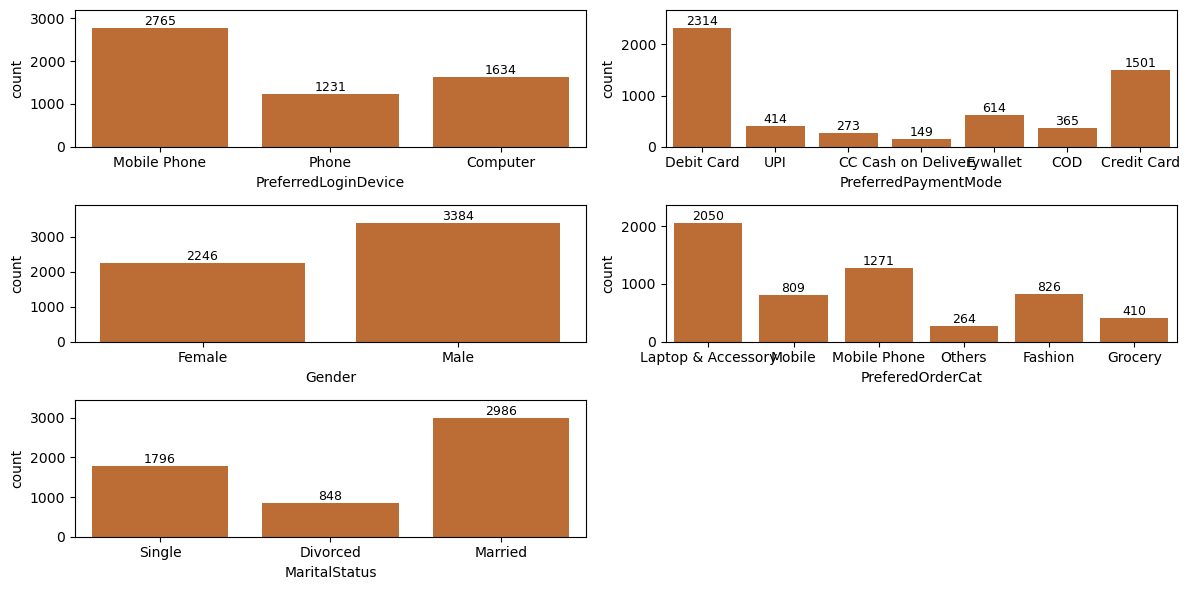

In [22]:
plt.figure(figsize=(12,6))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x=df[cats[i]], color='chocolate')
    plt.tight_layout()
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.f')
        ax.set_ylim(top = ax.get_ylim()[1]*1.1)

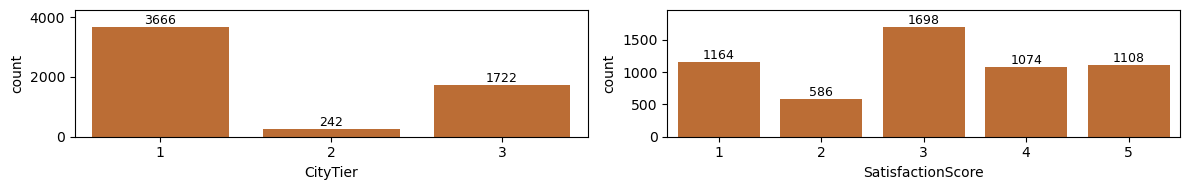

In [23]:
plt.figure(figsize=(12,2))
for i in range(0, len(ordinal)):
    plt.subplot(1, 2, i+1)
    ax = sns.countplot(x=df[ordinal[i]], color='chocolate')
    plt.tight_layout()
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.f')
        ax.set_ylim(top = ax.get_ylim()[1]*1.1)

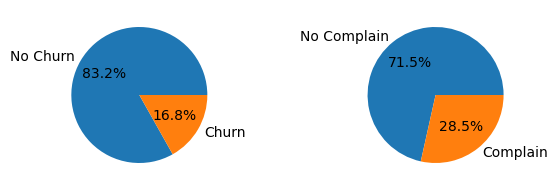

In [24]:
plt.figure(figsize=(12,2))
cats_bin = cats[4:]
for i in range(0, len(binary)):
    plt.subplot(1,4,i+1)
    data=df[binary[i]].value_counts()
    labels = [f'No {binary[i]}', f'{binary[i]}']
    plt.pie(data,labels=labels,autopct='%.1f%%')
    plt.tight_layout()

# Multivariate Analysis

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14480\2429998523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14480\2429998523.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', cmap='YlOrBr')


<Axes: >

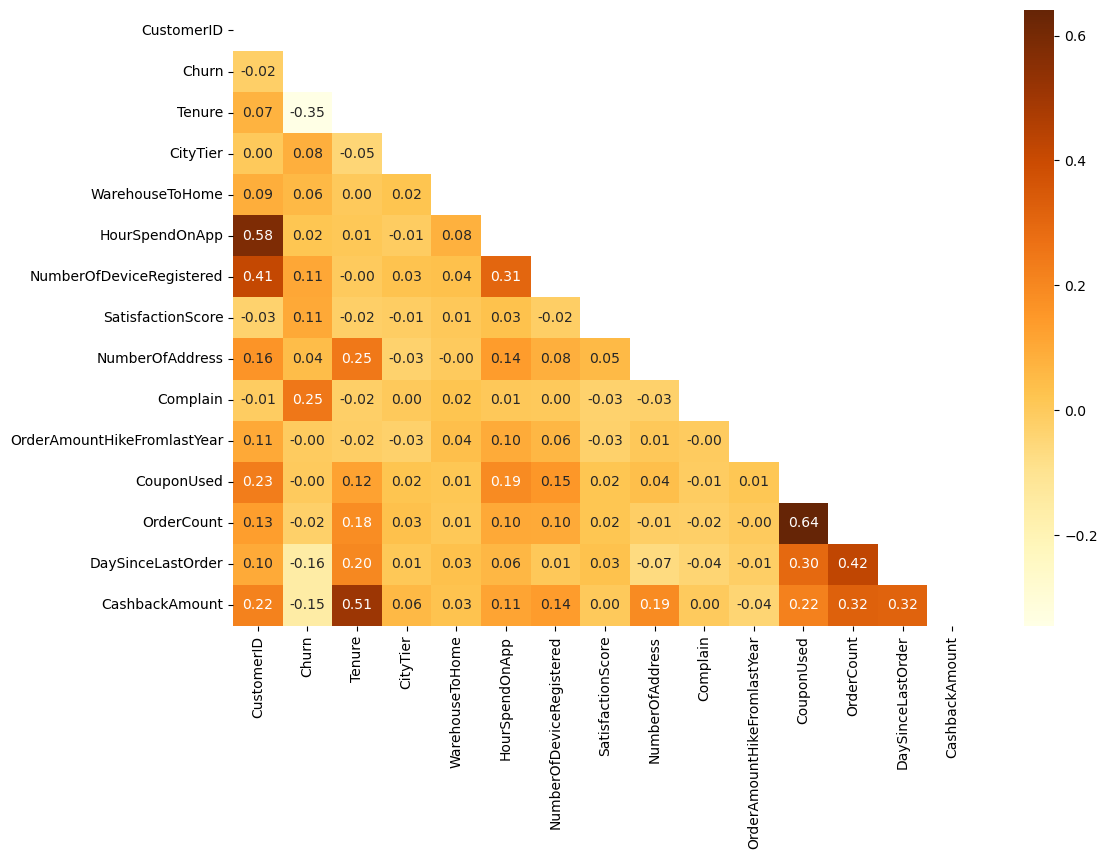

In [25]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', cmap='YlOrBr')

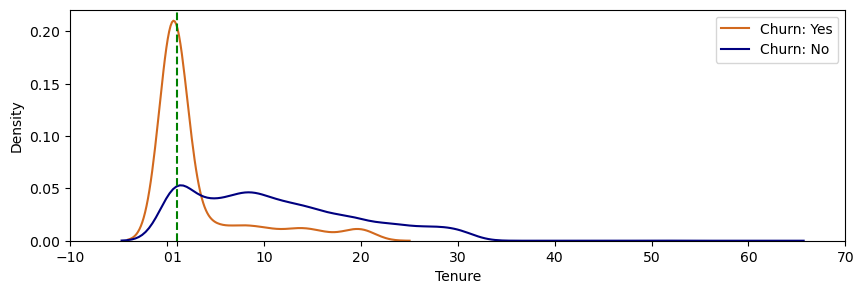

In [26]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'chocolate', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
plt.axvline(x=1, ls='--', color='green')
x_ticks = np.append(ax.get_xticks(), 1)
ax.set_xticks(x_ticks)
plt.legend(loc = 1)

In [27]:
def churn_plot(x, data):
    df_cats = data.copy()
    df_city = df_cats.groupby(x)['CustomerID'].nunique().reset_index(name='Total')
    df_churn =  df_cats.groupby([x, 'Churn'])['CustomerID'].nunique().reset_index(name='TotalCustomer')
    df_merge = df_churn.merge(df_city, on=x)
    df_merge['Percentage'] = round(df_merge['TotalCustomer']/df_merge['Total']*100,2)
    
    return df_merge

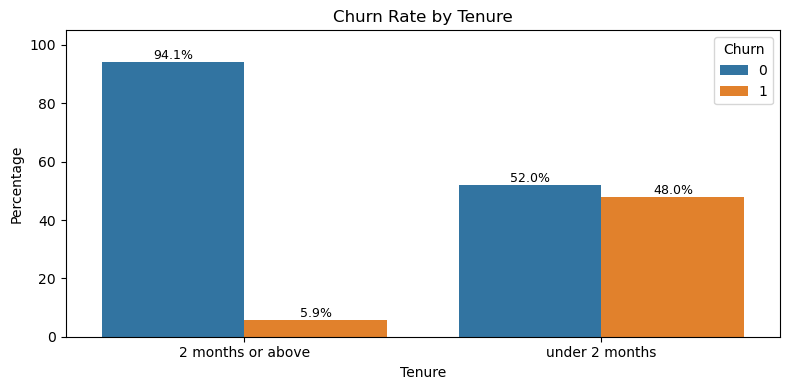

In [28]:
def segment(df):
    if df['Tenure'] < 2:
        return 'under 2 months'
    else:
        return '2 months or above'
        
df_tenure = df.copy()
df_tenure['Tenure'] = df_tenure.apply(lambda x: segment(x), axis=1)

plt.figure(figsize=(8,4))
data = churn_plot('Tenure', df_tenure)
ax = sns.barplot(x='Tenure', y='Percentage', data=data, hue = 'Churn')
ax.set_title('Churn Rate by Tenure')

for container in ax.containers:
    ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=1, title='Churn')
plt.tight_layout()

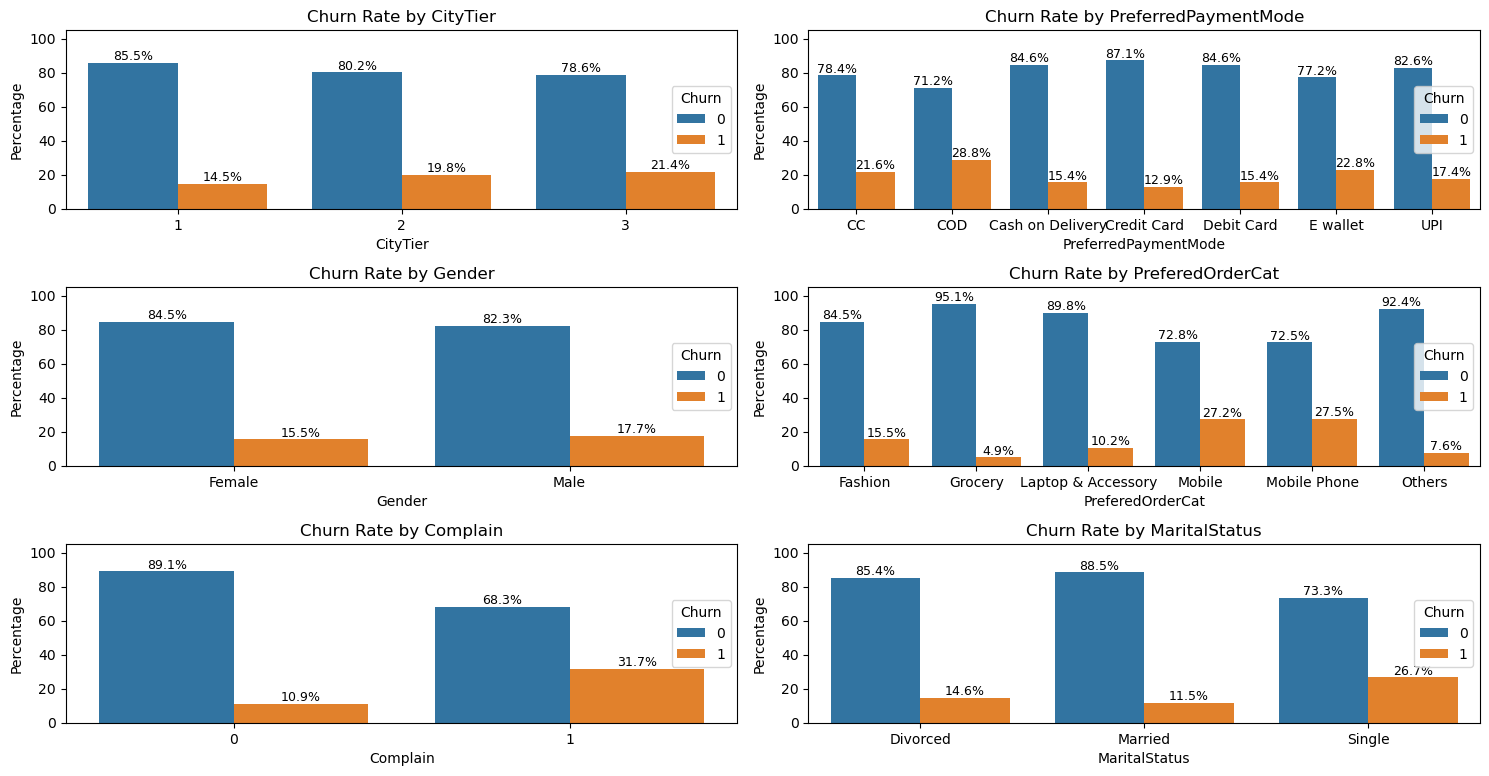

In [29]:
col = ['CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'Complain', 'MaritalStatus']
plt.figure(figsize=(15,10))
for i in range(0, len(col)):
    plt.subplot(4, 2, i+1)
    data = churn_plot(col[i], df)
    ax = sns.barplot(x=col[i], y='Percentage', data=data, hue = 'Churn')
    ax.set_title(f'Churn Rate by {col[i]}')

    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.1f%%')
        ax.set_ylim(top=105)
        ax.legend(loc='center right', title='Churn')
    plt.tight_layout()

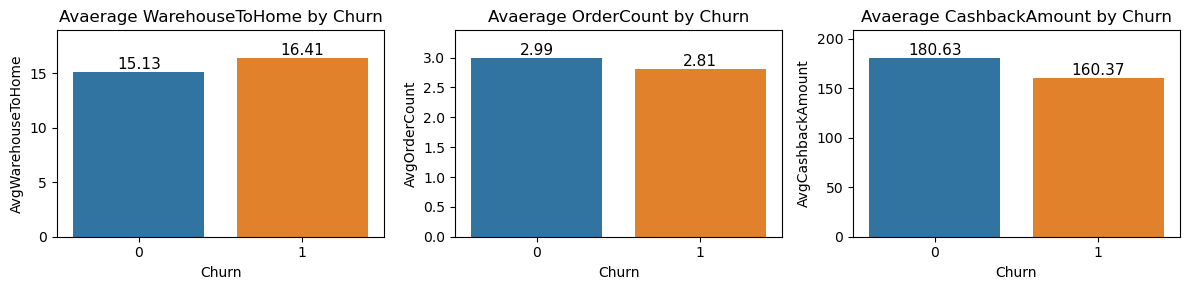

In [30]:
col = ['WarehouseToHome', 'OrderCount', 'CashbackAmount']
plt.figure(figsize=(12,3))
for i in range(0, len(col)):
    plt.subplot(1, 3, i+1)
    data = df.copy()
    data = data.groupby('Churn')[col[i]].mean().reset_index(name='Avg'+ col[i])
    ax = sns.barplot(x='Churn', y='Avg'+col[i], data=data)

    for container in ax.containers:
        ax.bar_label(container, fontsize=11, fmt='%.2f')
        ax.set_ylim(top=ax.get_ylim()[1]*1.1)
        ax.set_title(f'Avaerage {col[i]} by Churn')
    plt.tight_layout()

# Feature Encoding

In [31]:
df['Gender'] = df['Gender'].replace(['Female','Male'], [0, 1])
df['MaritalStatus'] = df['MaritalStatus'].replace(['Divorced'], ['Single'])
df['MaritalStatus'] = df['MaritalStatus'].replace(['Single','Married'], [0, 1])

In [32]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone','Mobile Phone'], ['Handphone', 'Handphone'])
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC','COD'], ['Credit Card','Cash on Delivery'])
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile','Mobile Phone', 'Laptop & Accessory'], ['Electronics', 'Electronics', 'Electronics'])

In [33]:
df = pd.get_dummies(df)
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,PreferredLoginDevice_Handphone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Electronics,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others
0,50001,1,4.0,3,6.0,0,3.0,3,2,0,...,1,0,0,1,0,0,1,0,0,0
1,50002,1,1.0,1,8.0,1,3.0,4,3,0,...,1,0,0,0,0,1,1,0,0,0
2,50003,1,1.0,1,30.0,1,2.0,4,3,0,...,1,0,0,1,0,0,1,0,0,0
3,50004,1,0.0,3,15.0,1,2.0,4,5,0,...,1,0,0,1,0,0,1,0,0,0
4,50005,1,0.0,1,12.0,1,3.0,3,5,0,...,1,0,1,0,0,0,1,0,0,0


## Feature Engineering

In [34]:
df['AvgCashback'] = df['CashbackAmount'] / df['OrderCount']

## Feature Transformation

In [35]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [36]:
column = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
          'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
          'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'AvgCashback']
for col in column:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(len(df),1))

In [37]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Electronics,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,AvgCashback
count,5630.000000,5630.000000,5.630000e+03,5.630000e+03,5.630000e+03,5630.000000,5.630000e+03,5.630000e+03,5.630000e+03,5630.000000,...,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5.630000e+03
mean,52815.500000,0.168384,6.562739e-17,7.256875e-18,6.562739e-17,0.601066,1.615444e-16,-4.038609e-17,-1.135859e-16,0.530373,...,0.091297,0.315098,0.411012,0.109059,0.073535,0.733570,0.146714,0.072824,0.046892,1.615444e-16
std,1625.385339,0.374240,1.000089e+00,1.000089e+00,1.000089e+00,0.489723,1.000089e+00,1.000089e+00,1.000089e+00,0.499121,...,0.288056,0.464596,0.492061,0.311740,0.261035,0.442131,0.353852,0.259871,0.211426,1.000089e+00
min,50001.000000,0.000000,-1.137890e+00,-7.152859e-01,-1.224096e+00,0.000000,-4.159858e+00,-2.626201e+00,-1.497592e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.790863e+00
25%,51408.250000,0.000000,-1.021291e+00,-7.152859e-01,-7.507352e-01,0.000000,-1.324850e+00,-6.729002e-01,-7.729924e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.162161e-01
50%,52815.500000,0.000000,-2.050949e-01,-7.152859e-01,-2.773744e-01,1.000000,9.265391e-02,3.037505e-01,-4.839247e-02,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.601491e-01
75%,54222.750000,0.000000,6.111011e-01,1.469771e+00,5.510072e-01,1.000000,9.265391e-02,3.037505e-01,6.762075e-01,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.270918e-01
max,55630.000000,1.000000,5.974674e+00,1.469771e+00,1.321341e+01,1.000000,2.927662e+00,2.257052e+00,1.400807e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.813543e+00


# Feature Selection

<Axes: >

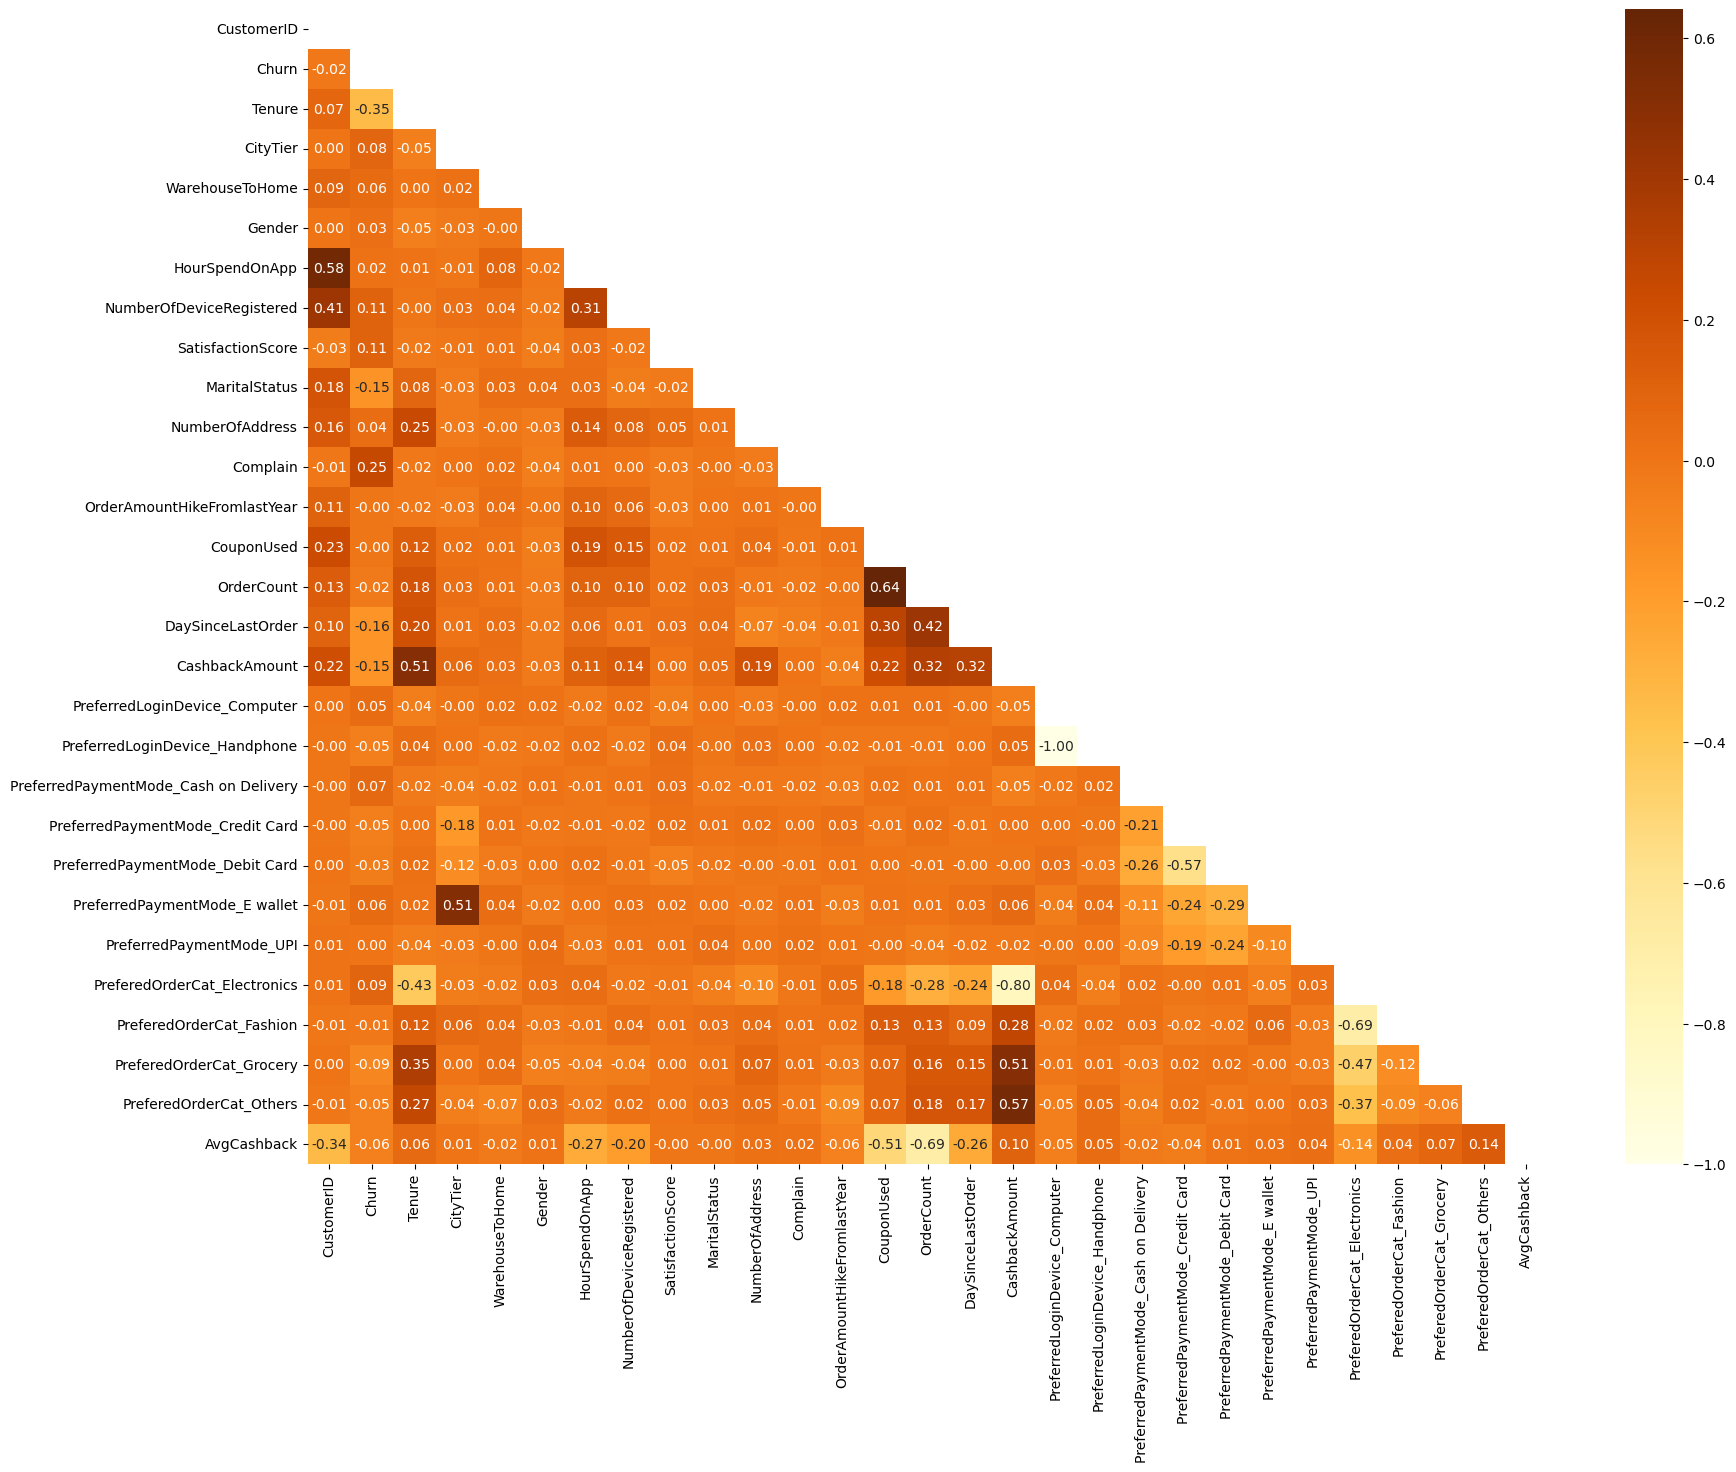

In [38]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', cmap='YlOrBr')

In [39]:
column = []
for col in df.columns:
    if (abs(df['Churn'].corr(df[col])) > 0.05):
        column.append(col)
df_final = df[column]
df_final.sample(3)

,Churn,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Handphone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_E wallet,PreferedOrderCat_Electronics,PreferedOrderCat_Grocery,PreferedOrderCat_Others,AvgCashback
972,0,-1.021291,-0.715286,1.379389,0.303750,1.400807,1,0,-1.249003,-1.102298,0,1,1,0,1,0,0,0.514629
4844,0,0.494502,1.469771,0.195987,1.280401,0.676207,1,0,-0.408739,0.910327,0,1,0,1,0,0,0,0.289703
1324,0,-0.554893,-0.715286,-0.750735,-0.672900,1.400807,0,0,-0.688827,-1.081969,0,1,1,0,1,0,0,0.533373


# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV

In [41]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 3. Modeling

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, make_scorer, confusion_matrix

In [52]:
f2_score = make_scorer(fbeta_score, pos_label=0, beta=2)

In [53]:
def evaluation(model_str, y_pred, y_pred_train):
    results = {
        'model': model_str,
        'acc test' : accuracy_score(y_test, y_pred),
        'acc train': accuracy_score(y_train, y_pred_train),
        'prec test' : precision_score(y_test, y_pred),
        'prec train' : precision_score(y_train, y_pred_train),
        'rec test' : recall_score(y_test, y_pred),
        'rec train' : recall_score(y_train, y_pred_train),
        'f2 test': fbeta_score(y_test, y_pred, pos_label=0,  beta=2),
        'f2 train': fbeta_score(y_train, y_pred_train, pos_label=0,  beta=2)
    }
    return results

In [58]:
model_dict = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

In [60]:
%%time
result_list = []
for model in model_dict:
    model_dict[model].fit(X_train, y_train)
    y_pred = model_dict[model].predict(X_test)
    y_pred_train = model_dict[model].predict(X_train)
    result = evaluation(model, y_pred, y_pred_train)
    result_list.append(result)
df_eval = pd.DataFrame(result_list)
df_eval

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: total: 7.36 s
Wall time: 4.21 s


,model,acc test,acc train,prec test,prec train,rec test,rec train,f2 test,f2 train
0,Logistic Regression,0.880107,0.879218,0.729508,0.724211,0.465969,0.454425,0.950675,0.950728
1,Decision Tree,0.944050,1.000000,0.844086,1.000000,0.821990,1.000000,0.967949,1.000000
2,KNN,0.898757,0.926732,0.798450,0.890311,0.539267,0.643329,0.959468,0.973080
3,Random Forest,0.966252,1.000000,0.937143,1.000000,0.858639,1.000000,0.984865,1.000000
4,AdaBoost,0.888099,0.890986,0.704403,0.726190,0.586387,0.564069,0.943276,0.948477
5,Gradient Boosting,0.896980,0.915409,0.773723,0.836918,0.554974,0.616909,0.955805,0.965459
6,XGBoost,0.975133,0.999778,0.931217,0.998681,0.921466,1.000000,0.985675,0.999786


# Cross Validation

In [61]:
%%time
result_list = {'Model' : [], 'f2 test cv': [], 'f2 train cv': []}
for model in model_dict:
    score = cross_validate(model_dict[model], X, y, cv=5, scoring=f2_score, return_train_score=True)
    ts = score['test_score'].mean()
    tr = score['train_score'].mean()
    result_list['Model'].append(model)
    result_list['f2 test cv'].append(ts)
    result_list['f2 train cv'].append(tr)
df_eval = pd.DataFrame(result_list)
df_eval

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

CPU times: total: 30.5 s
Wall time: 17.4 s


,Model,f2 test cv,f2 train cv
0,Logistic Regression,0.951652,0.951619
1,Decision Tree,0.986336,1.000000
2,KNN,0.968447,0.973736
3,Random Forest,0.990404,1.000000
4,AdaBoost,0.946255,0.949074
5,Gradient Boosting,0.960925,0.965439
6,XGBoost,0.991620,0.999776


# Hyper parameter tuning

In [62]:
%%time
model = XGBClassifier()

params = {
    'n_estimators' : [99],
    'learning_rate' : [0.27]
}

grid = GridSearchCV(estimator=model, param_grid=params, scoring=f2_score, cv=5)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_pred_train = grid.predict(X_train)

result_list = []
result = evaluation('XGBoost', y_pred, y_pred_train)
result_list.append(result)
df_eval = pd.DataFrame(result_list)


print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
df_eval

Best score: 0.974893557853461
Best parameters: {'learning_rate': 0.27, 'n_estimators': 99}
CPU times: total: 7.95 s
Wall time: 1.03 s


,model,acc test,acc train,prec test,prec train,rec test,rec train,f2 test,f2 train
0,XGBoost,0.968028,0.999112,0.923497,0.998675,0.884817,0.996037,0.983344,0.999626


Text(0.5, 1.0, 'Confusion Matrix')

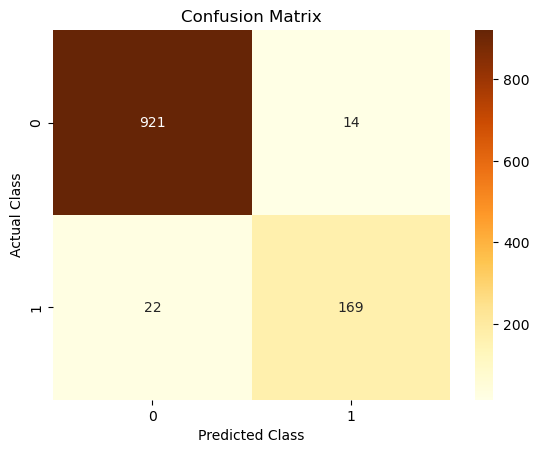

In [63]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix') # 884,28,13,145

# Feature Importance

Text(0.5, 1.0, 'feature importance score')

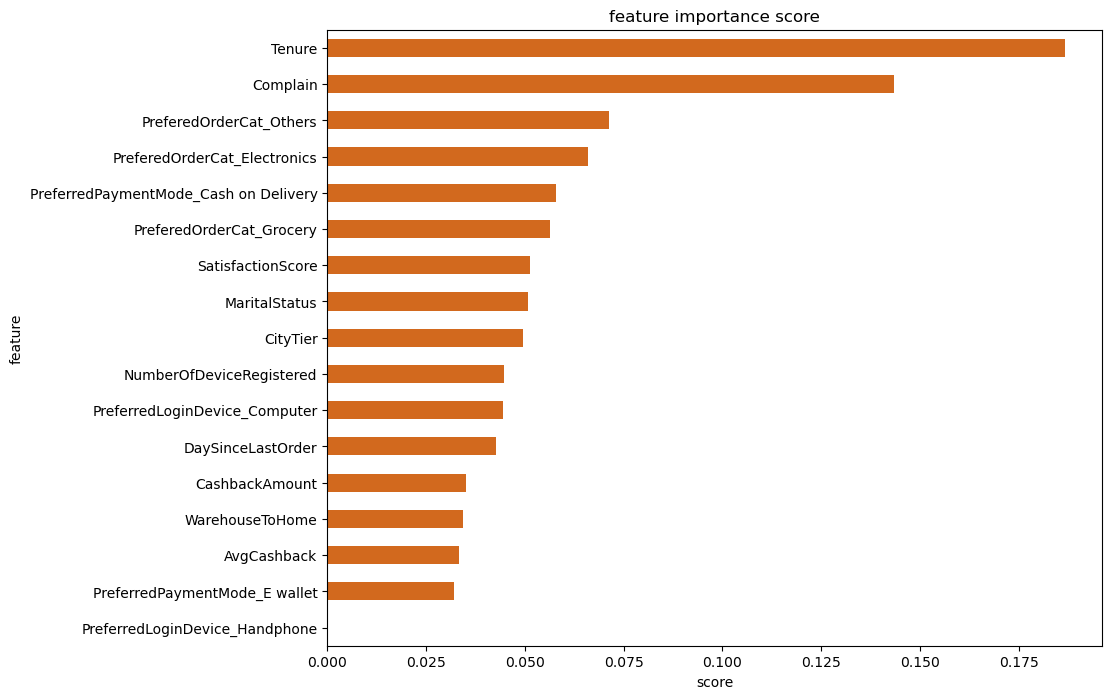

In [64]:
best_model = grid.best_estimator_
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8), color='chocolate')
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [66]:
pip install shap

   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/453.1 kB 960.0 kB/s eta 0:00:01
   -------- ------------------------------- 92.2/453.1 kB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/453.1 kB 1.5 MB/s eta 0:00:01
   ------------------ --------------------- 204.8/453.1 kB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 317.4/453.1 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [67]:
import shap
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

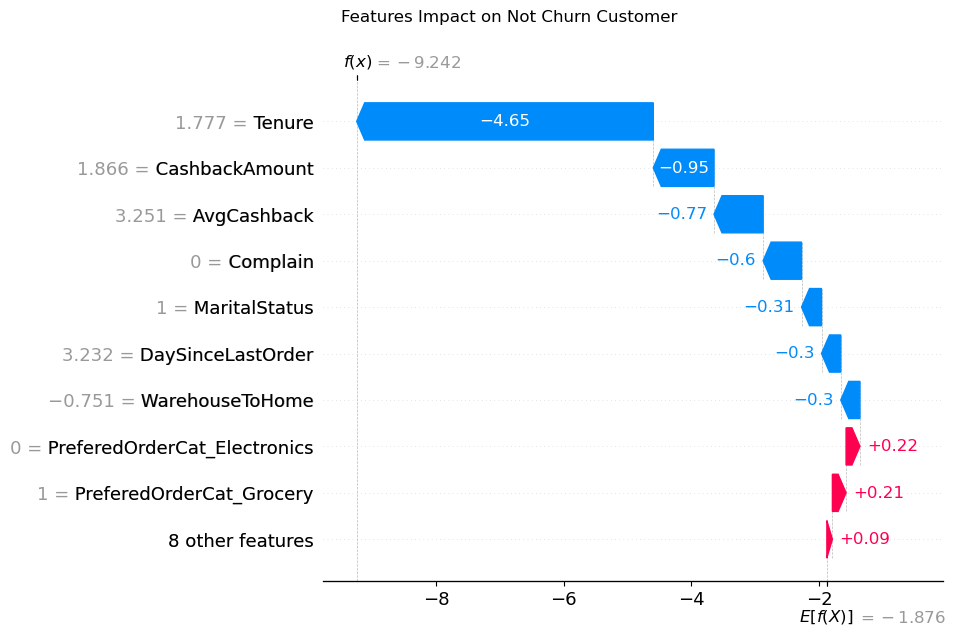

In [68]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0], show=False)
plt.title('Features Impact on Not Churn Customer',x=0.3, y=1.1)
plt.show()

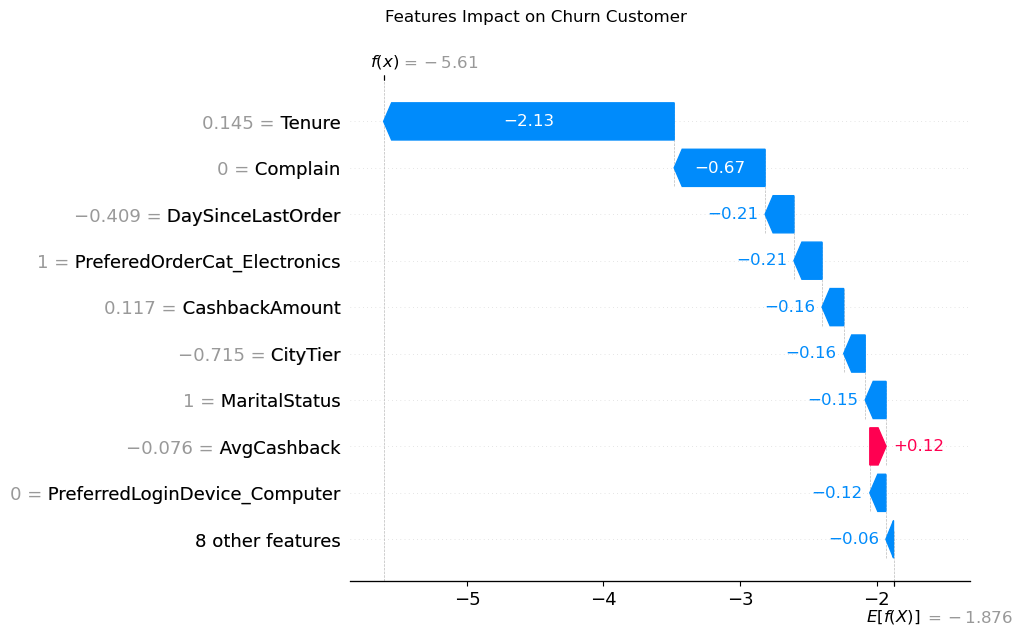

In [69]:
shap.plots.waterfall(shap_values[1], show=False)
plt.title('Features Impact on Churn Customer',x=0.3, y=1.1)
plt.show()